In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
# load dataset 
data = pd.read_csv('./weather.csv')

# filter NaN 
data = data.dropna()

# convert categorical data to numeric 
data = pd.get_dummies(data, drop_first=True)
print(data.head(200))

     Temperature  Precipitation   Humidity  WindSpeed     WindDir  CloudCover  \
0       6.530245            0.0  81.284900  15.946010  208.300750        73.0   
1       6.240245            0.0  83.227550  15.683774  211.865980        73.0   
2       6.210245            0.0  84.711200  16.704155  217.116870        84.0   
3       6.170245            0.1  84.946410  16.363178  219.644180        74.0   
4       6.160245            0.0  83.809130  16.323528  221.423660        50.0   
..           ...            ...        ...        ...         ...         ...   
195    -2.109755            0.0  74.626770   9.199390   30.579224        50.0   
196    -2.639755            0.0  76.380590   9.085988   33.690063        53.0   
197    -2.799755            0.0  75.120370   8.435069   39.805573        50.0   
198    -2.879755            0.0  73.492256   7.653705   41.185930        47.0   
199    -2.979754            0.0  72.337810   7.127636   44.999985        33.0   

     Pressure  
0      1012

In [3]:
### preprocess data 
X = data[["Temperature", "Humidity", "WindSpeed", "WindDir", "CloudCover", "Pressure"]]
y = data["Precipitation"]
y = (y > 0).astype(int)

# split data to training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()


In [4]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(X_train, '\n', X_test, y_train, '\n', y_test)

[[ 1.77340732 -1.77510948 -0.17696996  1.41184995  0.40640377 -0.18980237]
 [-0.41877861 -0.58103891 -0.1594245  -1.02087663  0.88525402 -0.05339207]
 [-0.1577127   0.78919278 -0.18360614  0.51593587  1.39403241  1.34219018]
 ...
 [ 2.92900789 -2.80724854 -0.63533485  1.85737381 -0.6949518  -0.62001945]
 [-0.93579143  0.91284139 -0.24017514  0.3148189  -1.44914095  0.8070421 ]
 [-0.24985361  1.16645426 -1.08378493 -0.50669169 -1.09000326  0.97493169]] 
 [[-1.12647195  0.92011638  0.43286373 -0.36180143 -0.07244648 -2.63469457]
 [-0.32663758  0.70988319  2.12232353  0.51515373  1.30424799 -1.16566063]
 [ 0.03424752  0.45249974  0.17612118  0.80476755  0.61590075 -0.72495045]
 ...
 [-0.59538197  0.1424174  -0.24480369  0.64855459  1.45388869  0.08301822]
 [ 0.62164595 -0.53913366 -0.55086251 -0.01999784  1.33417613 -0.03240587]
 [-1.78297589  0.79684634 -0.77645774 -0.25204909 -1.47906909  1.73043486]] 5198    0
1600    0
594     0
5664    0
1615    0
       ..
5734    0
5191    0
5390  

In [5]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 0.8592630501535312
Confusion Matrix:
 [[1452   83]
 [ 192  227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1535
           1       0.73      0.54      0.62       419

    accuracy                           0.86      1954
   macro avg       0.81      0.74      0.77      1954
weighted avg       0.85      0.86      0.85      1954



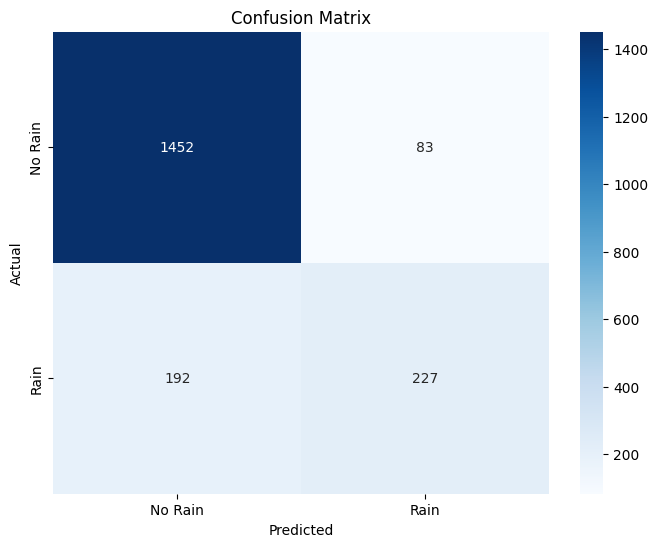

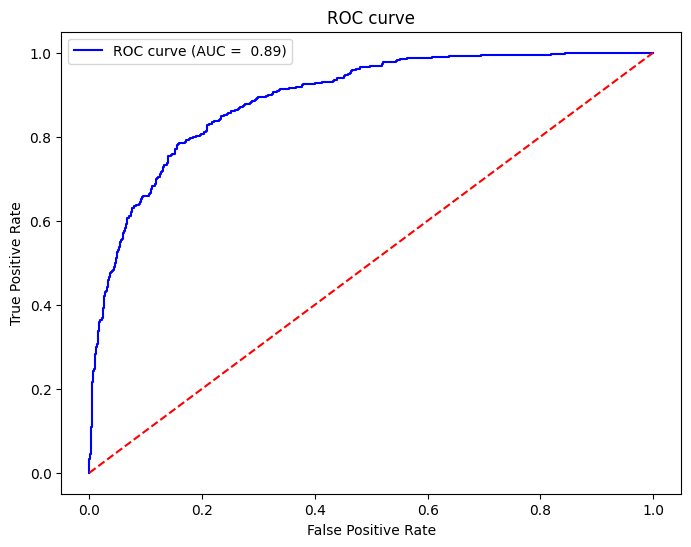

In [7]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# PLot roc curve 
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc: .2f})")
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

In [8]:
import joblib

In [9]:
# save the model 
joblib.dump(model, 'rain_prediction.pkl')
print('Model saved successfully')

Model saved successfully


In [10]:
loaded_model = joblib.load("rain_prediction.pkl")
print("Model loaded successfully")

# Example test data 
new_data = data[["Temperature", "Humidity", "WindSpeed", "WindDir", "CloudCover", "Pressure"]]
 
# Standardize the new data using the same scaler used for training
scaler = StandardScaler()
new_data_standardized = scaler.fit_transform(new_data)

# Make predictions
predictions = model.predict(new_data_standardized)
probabilities = model.predict_proba(new_data_standardized)[:, 1]

print('Predictions:', predictions)
print('Confidence:', probabilities)


Model loaded successfully
Predictions: [0 0 1 ... 0 0 0]
Confidence: [0.43341638 0.45606582 0.6171794  ... 0.17869742 0.33753951 0.31364282]
